# Exercício computacional 2: Projeto de filtros

Alunos: 
- Davi Giordano Valério, 11805273
- Henrique Lefundes da Silva, 11808280


In [875]:
using DSP, Plots, LaTeXStrings, LinearAlgebra, Plots.PlotMeasures, BenchmarkTools

In [876]:
# Definindo configurações padrões para todos os gráficos
graph_settings = (top_margin = 5mm,
    bottom_margin = 5mm,
    left_margin = 5mm,
    right_margin = 5mm,
    size = (750, 500));

In [877]:
function filter(h, x)
    y = zeros(length(x));
    for i in 1:length(h)
      y[i:end] += h[i]*x[begin:end + 1 - i];
    end;
    return y;
  end;
  

filter (generic function with 1 method)

### 1.a) Projeto do filtro passa-baixas com mínimos quadrados
 Na figura abaixo, é possível visualizar o filtro passa-baixas com N=81 coeficientes implementado.

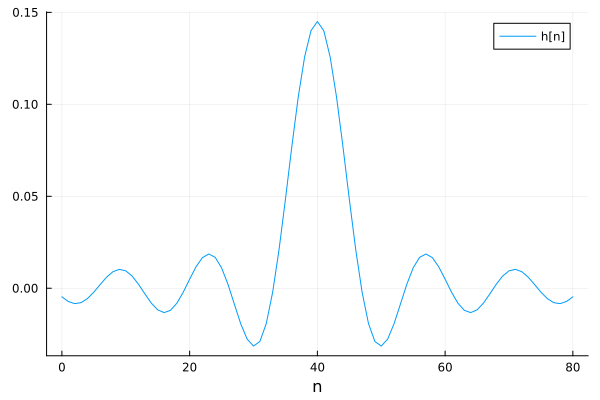

In [878]:
N = 81
n = 0:N-1
L = (N-1)/2
ωc = 29*π/200
hl = @. (ωc/π)*sinc((ωc/π)*(n-L))
plot(n, hl, label="h[n]")
xlabel!("n")

### 1.b) Projeto do filtro passa-altas com mínimos quadrados
 Na figura abaixo, é possível visualizar o filtro passa-altas com N=81 coeficientes implementado.

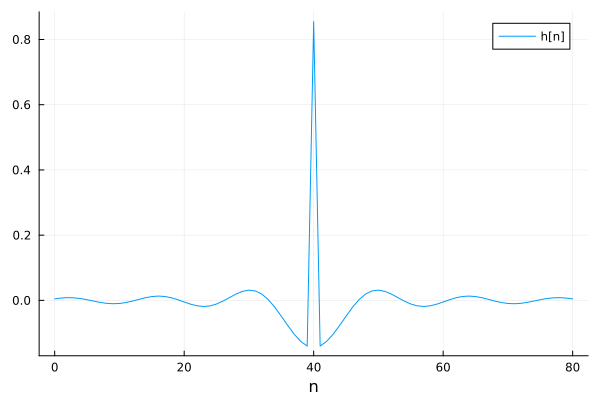

In [879]:
hh = @. sinc.(n.-L) - (ωc/π)*sinc((ωc/π)*(n-L)) # The sinc(n-L) works as an impulse 

plot(n, hh, label="h[n]")
xlabel!("n")

### 2. Implementação da convolução
Na célula abaixo, foi implementada a função 'conv( )' que recebe como entrada os coeficientes $h[n]$ com $n$ de $0$ a $N-1$ e $x[k]$, com $k$ de $0$ a $K-1$ e retorna a convolução entre $h[n]$ e $x[k]$, utilizando apenas laços for e comandos if, then e else. Além disso, o filtro assume que as entradas para $n<0$ são nulas e calcula a saída para os instantes de $0$ a $K-1$.

In [880]:
function conv(h::AbstractVector, x::AbstractVector)

    y = zeros(length(x))

    for n in 1:length(y)
        for k in 1:length(h)
            if (n - k + 1) > 0 && (n - k + 1) <= length(x)
                y[n] = y[n] + h[k]*x[n - k + 1]
            end
        end
    end

    return y
end

conv (generic function with 1 method)

### 3.a) Comparação entre a convolução implementada e 'filt' do DSP
Abaixo, é possível comparar a saída da convolução implementada anteriormente com a função filt para obter a saída dos filtros construídos para o sinal $$x[n] = cos(\pi n /25) + cos(\pi n /4)$$

In [881]:
n = 0:200-1

x = @. cos(π*n/25) + cos(π*n/4)
x1 = @. cos(π*n/25)
x2 = @. cos(π*n/4);

Em primeiro lugar, observa-se a resposta quando o passa baixa é aplicado:

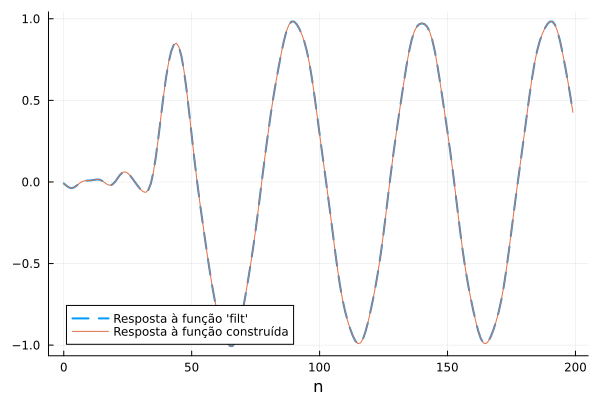

In [882]:
xfiltlow = filt(hl, x)
xconvlow = conv(hl, x)

x1 = @. cos(π*n/25)

plot(n, xfiltlow,  label = "Resposta à função 'filt'", linestyle=:dash, linewidth=2)
plot!(n, xconvlow, label = "Resposta à função construída")
xlabel!("n")

Em seguida, a resposta do passa-altas:

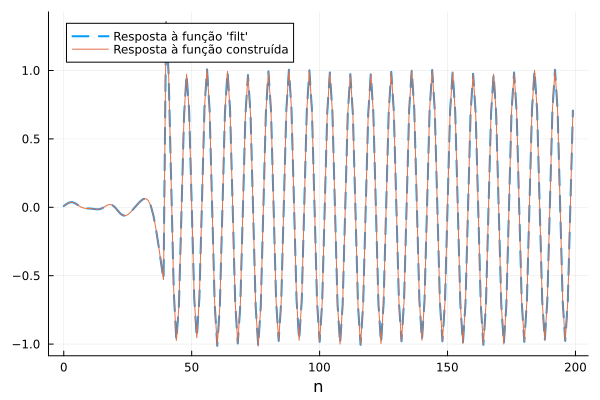

In [883]:
xfilthigh = filt(hh, x)
xconvhigh = conv(hh, x)

plot(n, xfilthigh,  label = "Resposta à função 'filt'", linestyle=:dash, linewidth=2)
plot!(n, xconvhigh, label = "Resposta à função construída")
xlabel!("n")

Em ambos os casos, é possível observar um período de transitório, seguido do cosseno cuja frequência não foi filtrada. Além disso, as respostas para ambos os métodos foi idêntica para o intervalo considerado, o que aponta que a função 'conv()' construída possui o comportamento esperado.

### 3.b) Resposta em frequência do filtro e análise da amplitude observada na saída

No gráfico a seguir, pode-se observar o módulo da resposta em frequência do filtro.

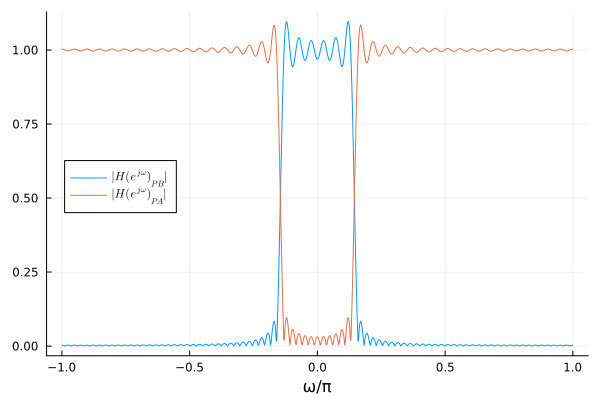

In [884]:
Hl = PolynomialRatio(hl, [1])
Hh = PolynomialRatio(hh, [1])
ω = range(-π, π, 1000)
HfreqLow = freqz(Hl, ω)
HfreqHigh = freqz(Hh, ω)

plot(ω/π, abs.(HfreqLow),  label = L"|H(e^{j\omega})_{PB}|", legend=:left)
plot!(ω/π, abs.(HfreqHigh), label = L"|H(e^{j\omega})_{PA}|")
xlabel!("ω/π")

No próximo, a fase do filtro passa-baixas (apenas para $\omega/\pi>0$, a fim de facilitar a visualização)

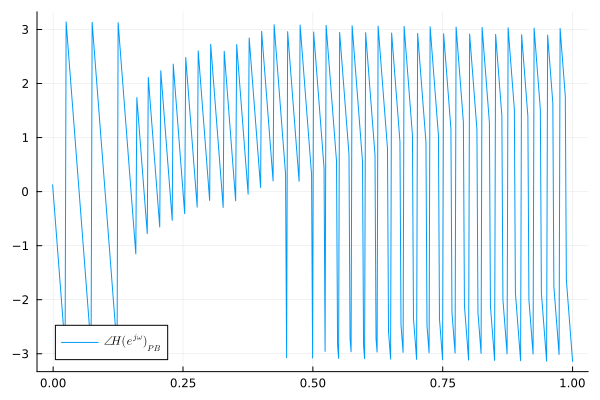

In [885]:
plot(ω[500:1000]/π, angle.(HfreqLow)[500:1000],  label = L"\angle H(e^{j\omega})_{PB}")

E, igualmente, para o passa-altas:

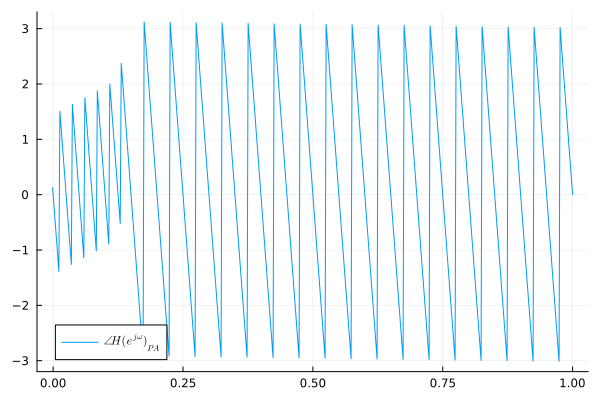

In [886]:
plot(ω[500:1000]/π, angle.(HfreqHigh[500:1000]), label = L"\angle H(e^{j\omega})_{PA}")


A seguir, é feita uma análise comparativa entre a amplitude esperada no sinal de saída dos filtros e a amplitude obtida.

In [887]:
println("Módulo da resposta em frequência do passa baixa para ","π/25: ", (abs.(HfreqLow)[520]))

Módulo da resposta em frequência do passa baixa para π/25: 0.9869107423221019


In [888]:
println("Módulo da resposta em frequência do passa baixa para ","π/25: ", (abs.(HfreqLow)[625]))

Módulo da resposta em frequência do passa baixa para π/25: 0.012679689479067969


Como é possível observar pelas células anteriores, espera-se que a saída do passa-baixas permita a passagem de $x_1[n] = cos(\pi n /25)$ com ganho próximo a 1 e filtre $x_2[n]= cos(\pi n /4)$ com atenuação igual a 0,01. No gráfico a seguir é possível comparar a saída do filtro com $x_1[n] = cos(\pi n /25)$ e atestar a proximidade dos dois sinais no regime permanente.

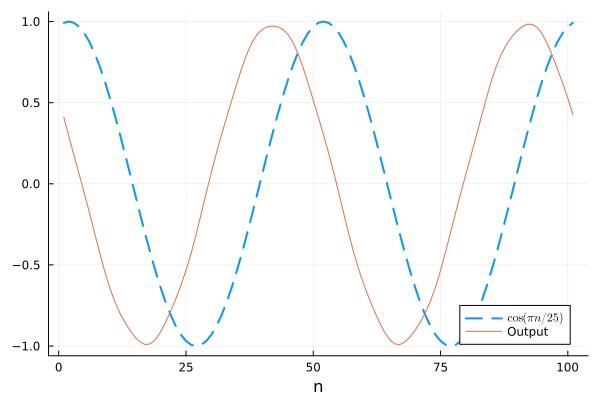

In [889]:
plot(x1[100:200],  linestyle=:dash, linewidth=2, label=L"\cos(πn/25)")
plot!(xfiltlow[100:200], label="Output")
xlabel!("n")

In [890]:
println("Módulo da resposta em frequência do passa-altas para ","π/25: ", (abs.(HfreqHigh)[520]))

Módulo da resposta em frequência do passa-altas para π/25: 0.013089257677900137


In [891]:
println("Módulo da resposta em frequência do passa-altas para ","π/25: ", (abs.(HfreqHigh)[625]))

Módulo da resposta em frequência do passa-altas para π/25: 0.9873203105209313


De maneira análoga, espera-se que a saída do passa-altas permita a passagem de $x_2[n] = cos(\pi n /4)$ com ganho próximo a 1 e filtre $x_1[n]= cos(\pi n /25)$ com atenuação próxima de 0,01. No gráfico a seguir é possível comparar a saída do filtro com $x_2[n] = cos(\pi n /4)$ e atestar a proximidade dos dois sinais no regime permanente.

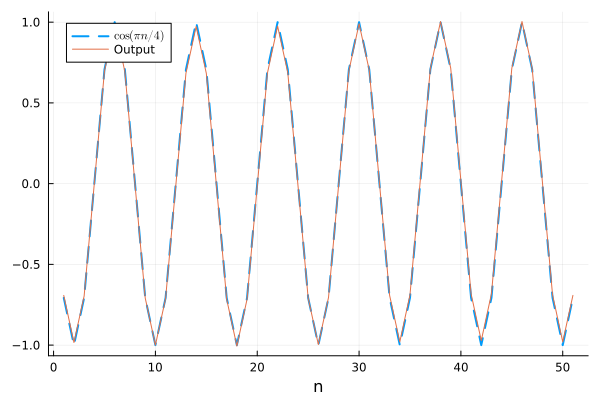

In [892]:
plot(x2[100:150],  linestyle=:dash, linewidth=2, label=L"\cos(πn/4)")
plot!(xfilthigh[100:150], label="Output")
xlabel!("n")

Uma vez que não foi fornecida uma máscara de projeto para os dois primeiros filtros, não se pode afirmar se a qualidade da atenuação da faixa de rejeição e o ganho da faixa de passagem estão de acordo com o esperado.

### 4. Filtro de Kaiser
Nesse item, serão implementados filtros com janela de Kaiser. As especificações fornecidas para máscara de projeto fornecidas são:
- Erro na banda passante menor ou igual a $0{,}005$
- Atenuação na banda de rejeição de pelo menos $0{,}001$


Em primeiro lugar, definiu-se uma função para obter o $\beta$ da janela de Kaiser:

In [893]:
function βkaiser(A)
    return A < 21 ? 0 : A ≤ 50 ? 0.5842(A-21)^0.4 + 0.07886(A-21) : 0.1102(A - 8.7)
end 

βkaiser (generic function with 1 method)

Com a menor atenuação especificada, $\beta$ obtido foi de:

In [894]:
δp = 0.005
δr = 0.001

A = -20*log10(min(δp, δr))
β = βkaiser(A)
println("β = $β")

β = 5.65326


### Passa-baixas com janela de Kaiser:
No passa-baixas, deseja-se eliminar a frequênca $\pi/4$. Dessa forma, define-se $ω_p = π/25$ e $ω_r = π/4$. A frequência de corte escolhida será a média dessas frequências. Em seguida, obtém-se o número de coeficientes conforme a especificação da janela e por conseguinte o valor L. Por fim, o filtro é construído por meio da função 'kaiser( )'.

In [895]:
ωp = π/25
ωr = π/4
ωc = (ωp + ωr)/2

Nk = (A-8)/(2.285*(abs(ωr-ωp))) + 1
Nk = Int16(ceil(Nk))
Lk = (Nk-1)/2
println("Número de coeficientes: $Nk")

n = 0:Nk-1
L = (Nk-1)/2
ωc = 29*π/200
hlkaiser = @. (ωc/π)*sinc((ωc/π)*(n-L))
hlkaiser = hlkaiser.*kaiser(Nk, β/π);

Número de coeficientes: 36


No próximo gráfico, é possível visualizar os coeficientes do filtro passa-baixas com a janela de Kaiser implementado.

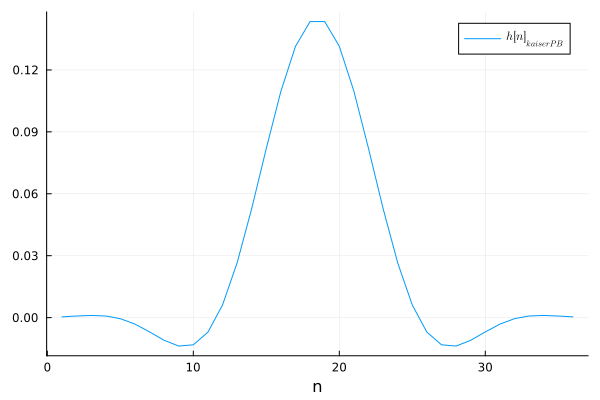

In [896]:
plot(hlkaiser, label = L"h[n]_{kaiserPB}")
xlabel!("n")

Em seguida, os gráficos do módulo e da fase da resposta em frequência do filtro passa baixa com janela de kaiser, comparados com a máscara de projeto

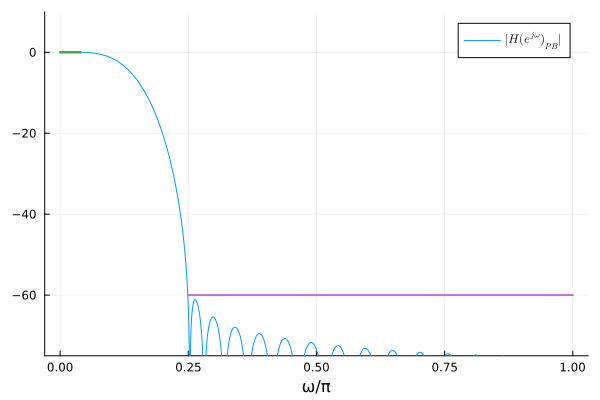

In [897]:
Hlkaiser = PolynomialRatio(hlkaiser, [1])
ω = range(0, π, 1000)
Hlkaiser = freqz(Hlkaiser, ω)

plot(ω/π, 20log10.(abs.(Hlkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-75, 10)

A seguir, é feito um 'zoom' nas frequências próximas a 0, a fim de observar se houve o atingimento da especificação da máscara.

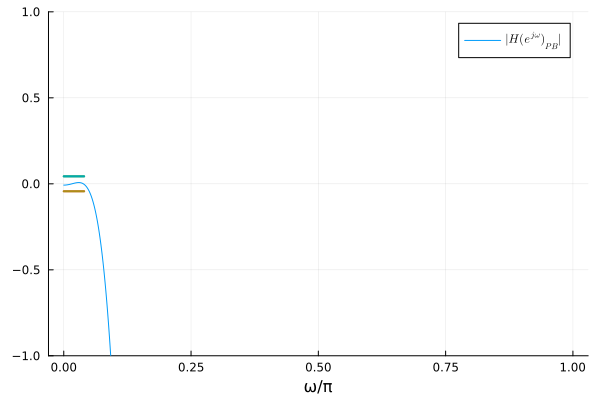

In [898]:
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-1, 1)

Em sequência, deseja-se observar as frequências próximas de 0.25.

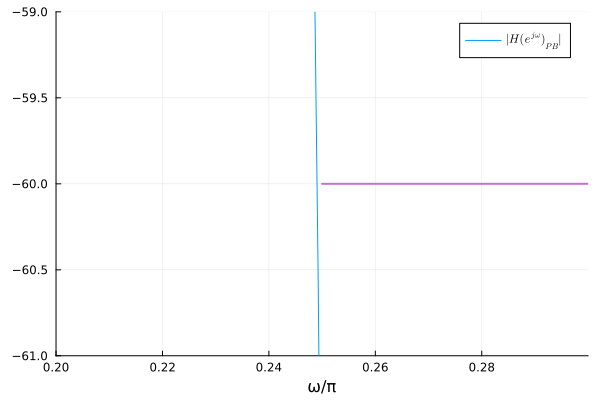

In [899]:
plot(ω/π, 20log10.(abs.(Hlkaiser)), label = L"|H(e^{j\omega})_{PB}|",
 xlabel = "ω/π")
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-61, -59)
xlims!(0.2, 0.3)

Por meio dos gráficos anteriores, é possível afirmar que o filtro implementado obedece à máscara de projeto proposta.

Abaixo, pode ser verificada a fase do filtro implementado.

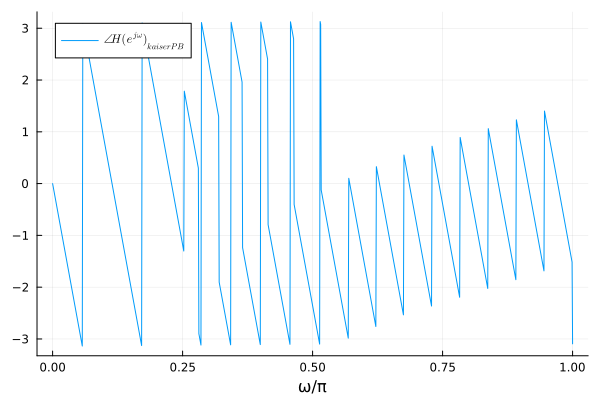

In [900]:
plot(ω/π, angle.(Hlkaiser), label = L"\angle H(e^{j\omega})_{kaiserPB}", legend=:topleft)
xlabel!("ω/π")

E, por fim, o sinal de saída após a convolução entre $x[n] = cos(\pi n /25) + cos(\pi n /4)$ e o filtro passa-baixas projetado, em comparação com o cosseno de menor frequência:

In [901]:
xkaiserlow = conv(hlkaiser, x);

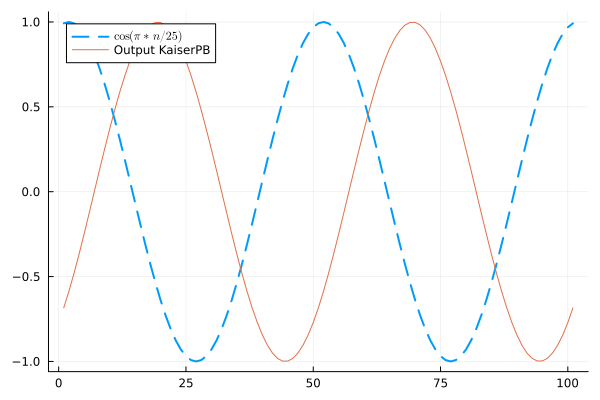

In [902]:
plot(x1[100:200],  linestyle=:dash, linewidth=2, label=L"\cos(π*n/25)")
plot!(xkaiserlow[100:200],  label = "Output KaiserPB", legend=:topleft)

Ao comparar a saída do filtro e a saída esperada, é possível dizer que o resultado do filtro é satisfatório. Isso pôde ser verificado de maneira mais rigorosa por meio da comparação do módulo da resposta em frequência com a máscara de projeto proposta.

### Passa-altas com janela de Kaiser:
No passa-altas, deseja-se eliminar a frequênca $\pi/25$. Dessa forma, primeiro tentou-se implementá-lo com $ω_p = π/4$ e $ω_r = π/25$. Após a verificação da máscara de projeto, foi possível observar que o filtro não atingia as especificações desejadas. Por isso, foi utilizada a frequência $ω_r = π/30$ para a frequência de rejeição.

 A frequência de corte escolhida será a média dessas frequências. Em seguida, obtém-se o número de coeficientes conforme a especificação da janela e por conseguinte o valor L. Por fim, o filtro é construído por meio da função 'kaiser( )'.

In [903]:
ωp = π/4
ωr = π/30
ωc = (ωp + ωr)/2

Nk = (A-8)/(2.285*(abs(ωr-ωp)))+1
Nk = Int16(ceil(Nk))
Nk % 2 == 0 ? Nk += 1 : Nk
n = 0:Nk-1
L = (Nk-1)/2

println("Número de coeficientes: $Nk")

hhkaiser = @. sinc.(n.-L) - (ωc/π)*sinc((ωc/π)*(n-L)) 
hhkaiser = hhkaiser.*kaiser(Nk, β/π);

Número de coeficientes: 35


No próximo gráfico, é possível visualizar os coeficientes do filtro passa-baixas com a janela de Kaiser implementado.

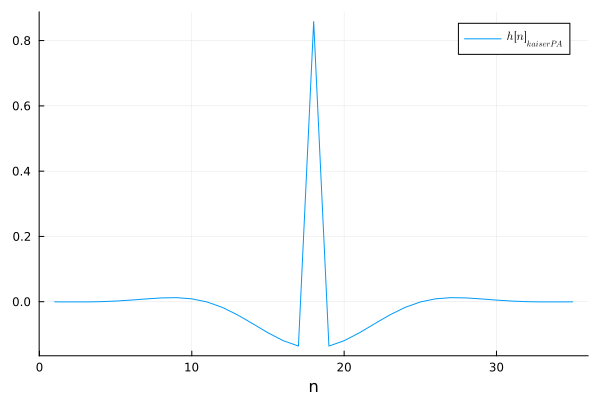

In [904]:
plot(hhkaiser, label = L"h[n]_{kaiserPA}")
xlabel!("n")

Em seguida, os gráficos do módulo e da fase da resposta em frequência do filtro passa alta com janela de kaiser.

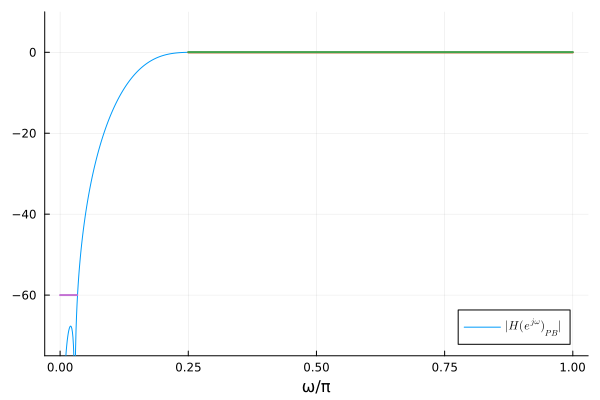

In [905]:
Hhkaiser = PolynomialRatio(hhkaiser, [1])
ω = range(0, π, 1000)
Hhkaiser = freqz(Hhkaiser, ω)

plot(ω/π, 20log10.(abs.(Hhkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-75, 10)

A seguir, é feito um 'zoom' nas frequências próximas a 0.25 rad, a fim de observar se houve o atingimento da especificação da máscara.

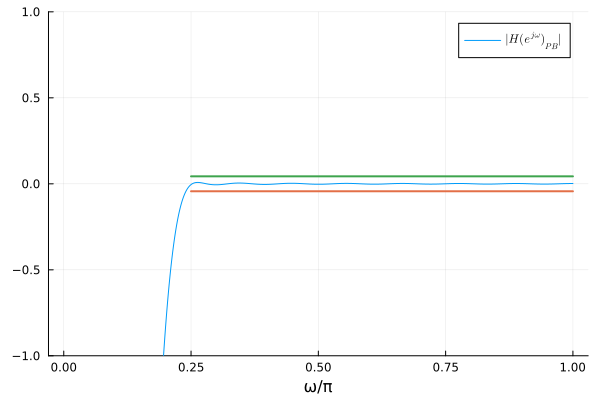

In [906]:
plot(ω/π, 20log10.(abs.(Hhkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-1, 1)

Em sequência, deseja-se observar as frequências próximas de 0.

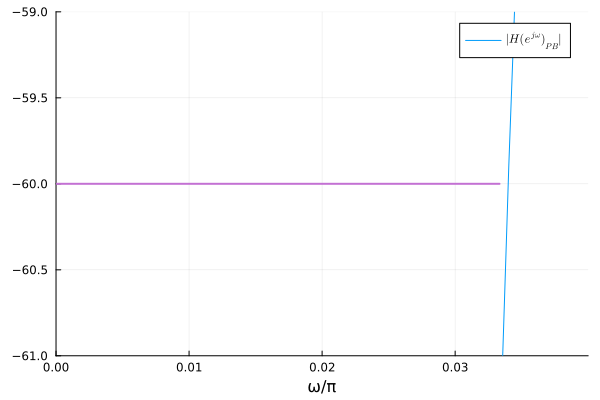

In [907]:
plot(ω/π, 20log10.(abs.(Hhkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-61, -59)
xlims!(0, 0.04)


Por meio dos gráficos anteriores, é possível afirmar que o filtro implementado obedece à máscara de projeto proposta.

Abaixo, pode ser verificada a fase do filtro implementado.

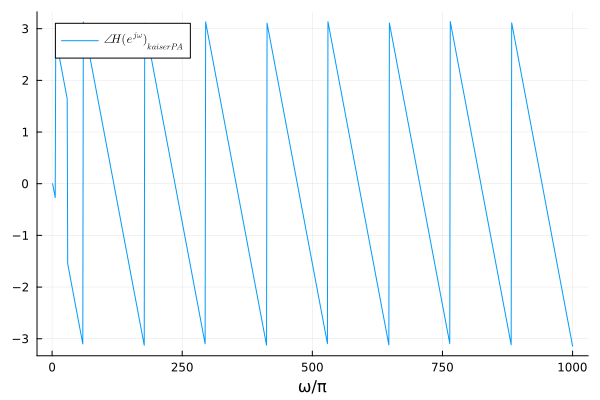

In [908]:
plot(angle.(Hhkaiser), label = L"\angle H(e^{j\omega})_{kaiserPA}", legend=:topleft)
xlabel!("ω/π")

E, por fim, o sinal de saída após a convolução entre $x[n] = cos(\pi n /25) + cos(\pi n /4)$ e o filtro passa-alta projetado, em comparação com o cosseno de maior frequência:

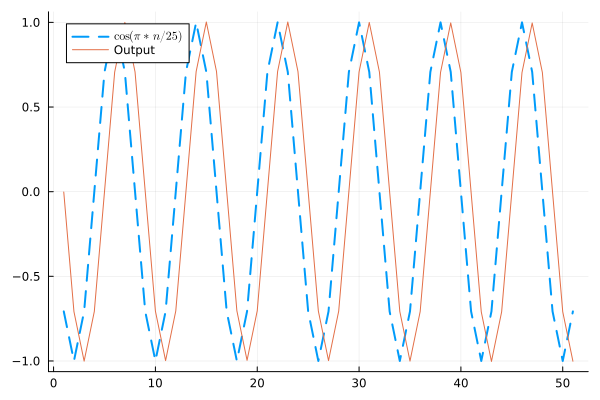

In [909]:
xkaiserhigh = conv(hhkaiser, x)

plot(x2[100:150],  linestyle=:dash, linewidth=2, label=L"\cos(π*n/25)")
plot!(xkaiserhigh[100:150],  label = "Output", legend=:topleft)

### 5. Filtro com minmax 
Nesse item, serão implementados filtros com o método de projeto minmax, por meio do algoritmo de Parks-McClellan. As especificações fornecidas para máscara de projeto fornecidas são:
- Erro na banda passante menor ou igual a $0{,}005$
- Atenuação na banda de rejeição de pelo menos $0{,}001$


### Passa-baixas com filtro minmax:
No passa-baixas, deseja-se eliminar a frequênca $\pi/4$. Dessa forma, define-se $ω_p = π/25$ e $ω_r = π/4$. A frequência de corte escolhida será a média dessas frequências. Em seguida, obtém-se o número de coeficientes conforme a especificação da janela e por conseguinte o valor L. Por fim, o filtro é construído por meio da função 'remez( )'.

A fim de atender às especificações, foi necessário adicionar mais 2 pontos ao comprimento do filtro

In [910]:
δp = 0.005
δr = 0.001

ωp = π/25
ωr = π/4

Nmm = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*(abs(ωr-ωp)))) + 3 + 3

println(Nmm)

hlminmax = remez(Nmm, [(0, ωp/π) => (1, 1), (ωr/π, 1) => (0, δp/δr)]; Hz = 2);

33


No próximo gráfico, é possível visualizar os coeficientes do filtro passa-baixas com o método do minmax implementado.

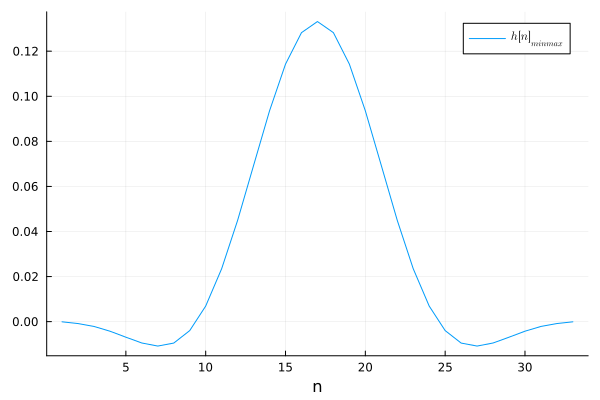

In [911]:
plot(hlminmax, label = L"h[n]_{minmax}")
xlabel!("n")

Em seguida, os gráficos do módulo e da fase da resposta em frequência do filtro passa baixa com janela de kaiser, comparados com a máscara de projeto

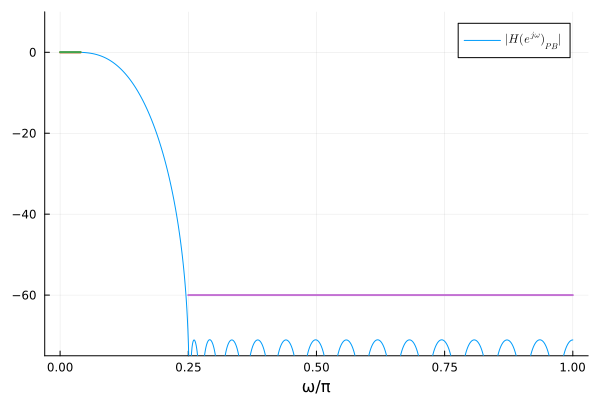

In [912]:
Hlminmax = PolynomialRatio(hlminmax, [1])
ω = range(0, π, 1000)
Hlminmax = freqz(Hlminmax, ω)

plot(ω/π, 20log10.(abs.(Hlminmax)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-75, 10)

A seguir, é feito um 'zoom' nas frequências próximas a 0, a fim de observar se houve o atingimento da especificação da máscara.

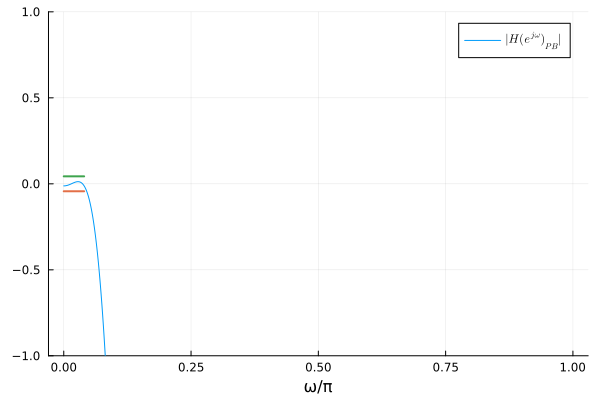

In [913]:
plot(ω/π, 20log10.(abs.(Hlminmax)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-1, 1)

Em sequência, deseja-se observar as frequências próximas é feito um 'zoom' nas frequências próximas de 0.25.

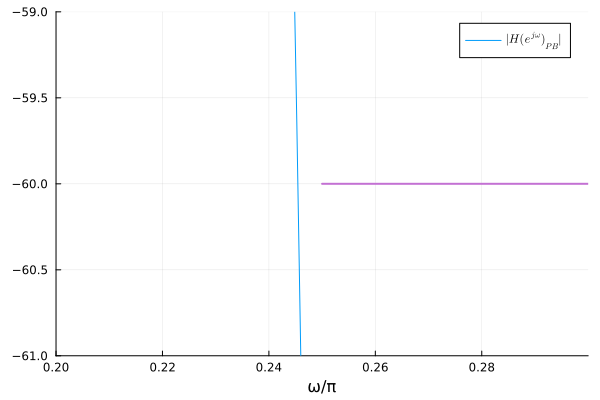

In [914]:
plot(ω/π, 20log10.(abs.(Hlminmax)), label = L"|H(e^{j\omega})_{PB}|",
 xlabel = "ω/π")
plot!([0,ωp/π], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([0,ωp/π], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([ωr/π,1.0], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-61, -59)
xlims!(0.2, 0.3)

Por meio dos gráficos anteriores, é possível afirmar que o filtro implementado obedece à máscara de projeto proposta.

Abaixo, pode ser verificada a fase do filtro implementado.

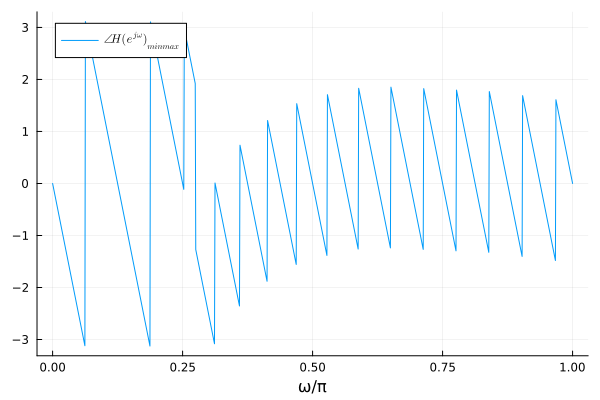

In [915]:
plot(ω/π, angle.(Hlminmax), label = L"\angle H(e^{j\omega})_{minmax}", legend=:topleft)
xlabel!("ω/π")

E, por fim, o sinal de saída após a convolução entre $x[n] = cos(\pi n /25) + cos(\pi n /4)$ e o filtro passa-baixas projetado, em comparação com o cosseno de menor frequência:

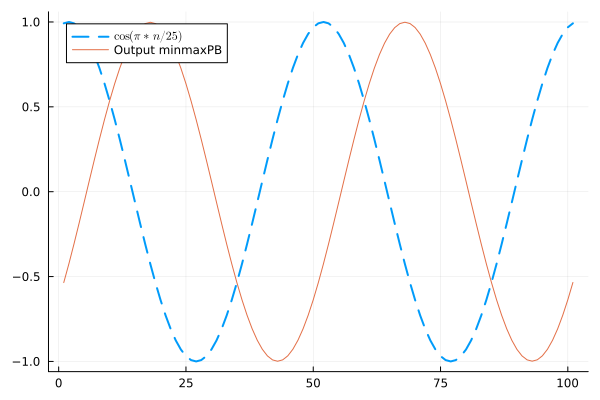

In [916]:
xminmaxlow = conv(hlminmax, x) 

plot(x1[100:200],  linestyle=:dash, linewidth=2, label=L"\cos(π*n/25)")
plot!(xminmaxlow[100:200],  label = "Output minmaxPB", legend=:topleft)

Ao comparar a saída do filtro e a saída esperada, é possível dizer que o resultado do filtro é satisfatório. Isso pôde ser verificado de maneira mais rigorosa por meio da comparação do módulo da resposta em frequência com a máscara de projeto proposta.

### Passa-altas com minmax:
No passa-altas, deseja-se eliminar a frequênca $\pi/25$. Dessa forma, primeiro tentou-se implementá-lo com $ω_p = π/4$ e $ω_r = π/25$. 

Após a verificação da máscara de projeto, foi possível observar que o filtro não atingia as especificações desejadas, visto que a atenuação nas baixas frequências não era baixa o suficiente. Para atingir essa especificação, aumentou-se o comprimento do filtro em 8 pontos. Além disso, foi necessário reduzir a frequência de rejeição para $ω_r = π/30$, a fim de produzir a atenuação desejada.

 Por fim, o filtro é construído por meio da função 'remez( )'.

In [917]:
δp = 0.005
δr = 0.001

ωp = π/4
ωr = π/30

Nmm = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*(abs(ωr-ωp)))) + 3 + 8
Nmm % 2 == 0 ? Nmm += 1 : Nmm

println(Nmm)

hhminmax = remez(Nmm, [(0, ωr/π) => (0, δr/δp), (ωp/π, 1) => (1, 1)]; Hz = 2);

37


No próximo gráfico, é possível visualizar os coeficientes do filtro passa-baixas com minmax implementado.

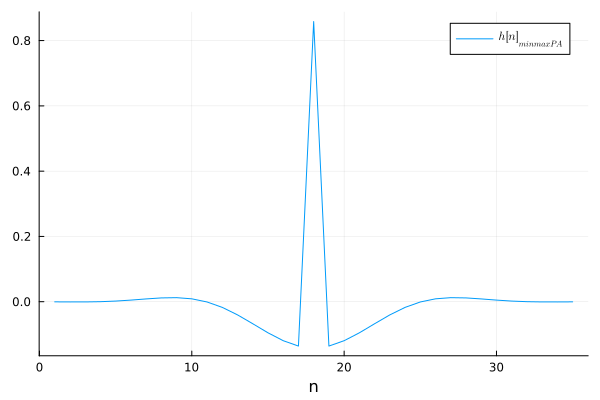

In [918]:
plot(hhkaiser, label = L"h[n]_{minmaxPA}")
xlabel!("n")

Em seguida, os gráficos do módulo e da fase da resposta em frequência do filtro passa alta com minmax.

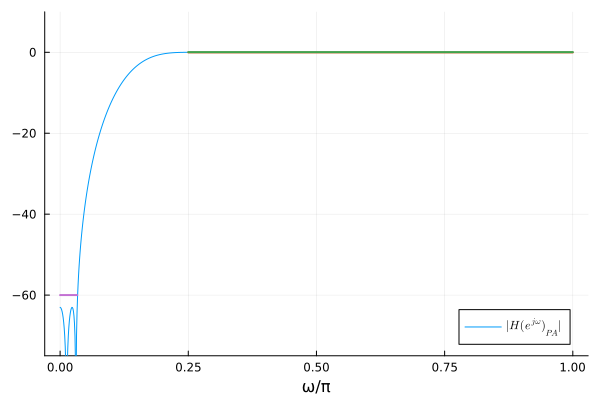

In [919]:
Hhminmax = PolynomialRatio(hhminmax, [1])
ω = range(0, π, 1000)
Hhminmax = freqz(Hhminmax, ω)

plot(ω/π, 20log10.(abs.(Hhminmax)), label = L"|H(e^{j\omega})_{PA}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-75, 10)

A seguir, é feito um 'zoom' nas frequências próximas a 0.25 rad, a fim de observar se houve o atingimento da especificação da máscara.

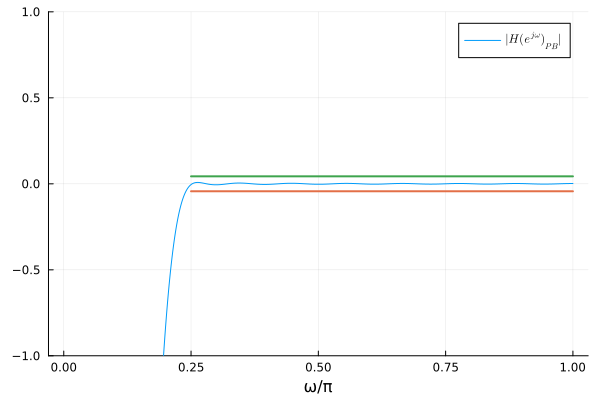

In [920]:
plot(ω/π, 20log10.(abs.(Hhkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-1, 1)

Em sequência, deseja-se observar as frequências próximas de 0.

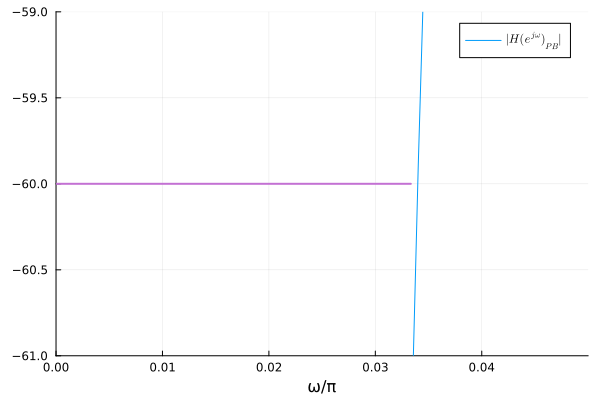

In [921]:
plot(ω/π, 20log10.(abs.(Hhkaiser)), label = L"|H(e^{j\omega})_{PB}|", xlabel = "ω/π")
plot!([ωp/π,1.0], 20log10(1-δp)*[1,1], lw = 2, label = "")
plot!([ωp/π,1.0], 20log10(1+δp)*[1,1], lw = 2, label = "")
plot!([0,ωr/π], 20log10(δr)*[1,1], lw = 2, label = "")
ylims!(-61, -59)
xlims!(0, 0.05)

Por meio dos gráficos anteriores, é possível afirmar que o filtro implementado obedece à máscara de projeto proposta.

Abaixo, pode ser verificada a fase do filtro implementado.

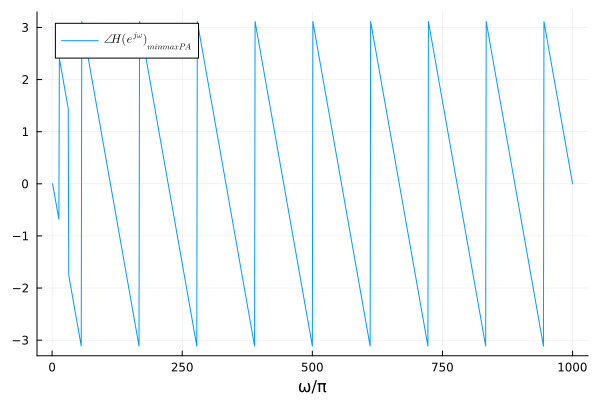

In [922]:
plot(angle.(Hhminmax), label = L"\angle H(e^{j\omega})_{minmaxPA}", legend=:topleft)
xlabel!("ω/π")

E, por fim, o sinal de saída após a convolução entre $x[n] = cos(\pi n /25) + cos(\pi n /4)$ e o filtro passa-alta projetado, em comparação com o cosseno de maior frequência:

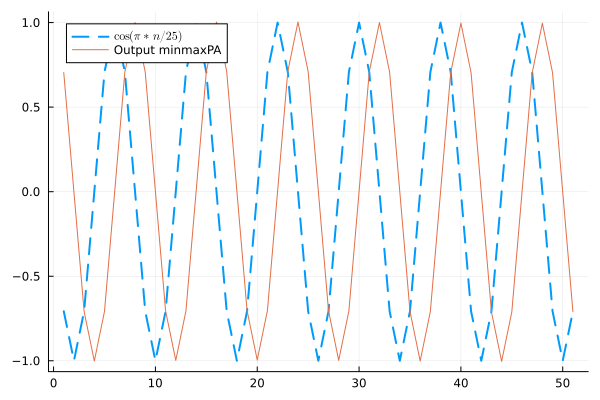

In [923]:
xminmaxhigh = conv(hhminmax, x)

plot(x2[100:150],  linestyle=:dash, linewidth=2, label=L"\cos(π*n/25)")
plot!(xminmaxhigh[100:150],  label = "Output minmaxPA", legend=:topleft)

### Conclusão
Nesse exercício programa, foi possível implementar uma função que realiza a convolução usando apenas operações básicas e atestar que sua aplicação é equivalente à função 'filt' da biblioteca DSP. Além disso, foi possível projetar e implementar filtros Passa-Altas e Passa-Baixas com Janela de Kaiser e com o método min-max. 

Foi interessante observar que as fórmulas empíricas para projeto dos filtros podem não fornecer um filtro que atende às especificações definidas na máscara de projeto, o que torna necessário avaliar o gráfico da resposta em frequência e alterar os parâmetros do cálculo a fim de obter o resultado desejado.